In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load calories and steps csv data
minute_calories_narrow = pd.read_csv('datasets/minuteCaloriesNarrow_merged.csv')
minute_steps_narrow = pd.read_csv('datasets/minuteStepsNarrow_merged.csv')

In [3]:
# merge calories and steps on minute level.
minute_detail = pd.merge(minute_calories_narrow, minute_steps_narrow, on=['Id', 'ActivityMinute'])
minute_detail.shape

(1325580, 4)

In [4]:
minute_detail.head()

,Id,ActivityMinute,Calories,Steps
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0


In [5]:
# load heartrate csv data
heartrate = pd.read_csv('datasets/heartrate_seconds_merged.csv')
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [14]:
heartrate.shape

(2483658, 3)

### Merge into single dataframe 
- fitbit records heartrate data in every 5 seconds(It is a snapshot).
- take the heartrate's snapshot in that particular minute when calories and steps were recorded.

In [6]:

minute_detail = pd.merge(minute_detail, heartrate, how='left', left_on=['Id', 'ActivityMinute'], right_on=['Id', 'Time'])

### Drop NA values.
- All users didn't have heart rate data available.

In [15]:
minute_detail = minute_detail.dropna()
minute_detail = minute_detail.drop('Time', axis=1)
print(minute_detail.shape, heartrate.shape)

(200073, 5) (2483658, 3)


In [16]:
minute_detail.head()

,Id,ActivityMinute,Calories,Steps,Value
0,2022484408,4/12/2016 7:21:00 AM,3.32064,17,97.0
1,2022484408,4/12/2016 7:23:00 AM,1.34901,0,60.0
2,2022484408,4/12/2016 7:24:00 AM,1.03770,0,58.0
3,2022484408,4/12/2016 7:26:00 AM,2.49048,7,53.0
4,2022484408,4/12/2016 7:27:00 AM,1.03770,0,53.0


No. of users that have all three records (heartrate, calories, steps) is 14.

In [17]:
minute_detail.Id.nunique()

14

In [18]:
minute_detail.Id.value_counts()

4388161847    26588
6962181067    25926
5553957443    23880
5577150313    22336
4558609924    17895
6117666160    16796
2347167796    15157
8792009665    13509
2022484408    13358
7007744171    12385
4020332650     4790
8877689391     3885
6775888955     3331
2026352035      237
Name: Id, dtype: int64

In [19]:
# Save to CSV
minute_detail.reset_index(inplace=True, drop=True)
minute_detail.to_csv('all-merged.csv',index=False)

In [20]:
minute_detail

,Id,ActivityMinute,Calories,Steps,Value
0,2022484408,4/12/2016 7:21:00 AM,3.32064,17,97.0
1,2022484408,4/12/2016 7:23:00 AM,1.34901,0,60.0
2,2022484408,4/12/2016 7:24:00 AM,1.03770,0,58.0
3,2022484408,4/12/2016 7:26:00 AM,2.49048,7,53.0
4,2022484408,4/12/2016 7:27:00 AM,1.03770,0,53.0
...,...,...,...,...,...
200068,8877689391,5/12/2016 12:23:00 PM,8.24364,97,100.0
200069,8877689391,5/12/2016 12:24:00 PM,8.24364,101,97.0
200070,8877689391,5/12/2016 12:25:00 PM,7.75872,101,93.0
200071,8877689391,5/12/2016 1:54:00 PM,1.33353,0,63.0


In [25]:
# Plot graph for single user
df = minute_detail.loc[minute_detail['Id']==4388161847 ]

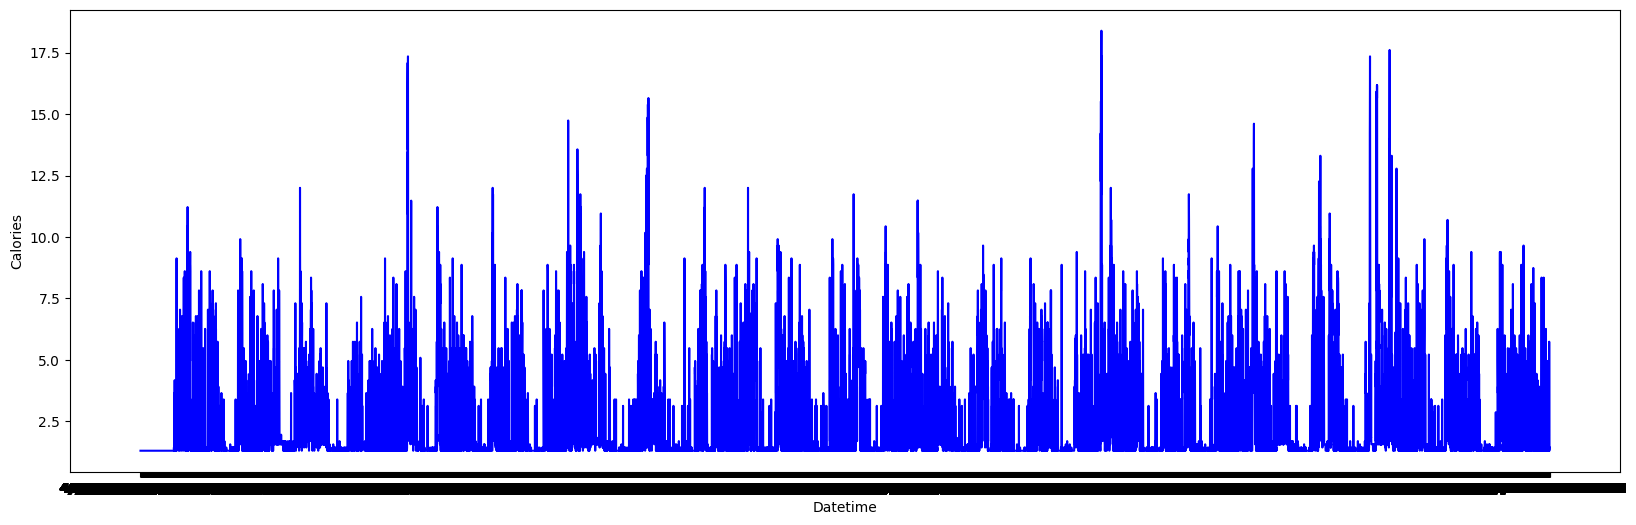

In [26]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20,6))

# a = df.loc[df['is_anomaly'] == 1, ['Calories']] 
ax.plot(df['ActivityMinute'],df['Calories'], color='blue')
ax.set_xlabel("Datetime")
ax.set_ylabel("Calories")
plt.show()